(proj-mot)=
# Projectile motion

## Overview

Links to programs in this lesson:

1. [x and y motion components](x-y-comps)
1. [Projectile motion graphs](proj-mot-graphs)

This lesson combines together essentially everything you have seen so far in the course. Much like [Lesson 05 (acceleration and free-fall)](accel), a projectile is an object in a gravitational field, which determines the acceleration of the object. In that lesson, we used a vPython simulation to visualize the projectile's motion; you will do the same thing here, only now in two dimensions. Not only can the projectile go up and down, but now it can go sideways!

The object's constant acceleration can be used in conjunction with the kinematic equations from [Lesson 06](kin-eqns) to describe the motion at any time between its start and end. Specifically, this means solving for the position or velocity vectors. To actually calculate for these quantities, we need their vector components; however, in [Lesson 07 (vector magnitude and direction)](vec-mag-dir), you saw how to switch between a description of a vector in terms of components, and one given by magnitude and direction. Also, we can now graph both the position and velocity components in both the horizontal and vertical directions, and see how the constant downward gravitational field results in characteristic shapes for these graphs.

```{figure} ../img/318px-Tartaglia.jpg
---
height: 250px
---
Niccolo Fontana Tartaglia ([source](https://commons.wikimedia.org/wiki/File:Portret_van_Niccolo_Tartaglia_Nicolavs_Tartaglia_Brixianvs_(titel_op_object)_Portretten_van_beroemde_Europese_geleerden_(serietitel)_Virorum_doctorum_de_Disciplinis_benemerentium_effigies_(serietitel),_RP-P-1909-4459.jpg))
```

The first systematic and mathematical examination of the path of a projectile was undertaken by Niccolo Fontana in the *Nova Scientia* (1537). He is better known as "Tartaglia" (the Stammerer) from injuries suffered when a French soldier sliced his jaw and palate with a saber, leaving him unable to speak without difficulty. He never shaved after that, in order to hide the scars. Tartaglia is also well-known for his feud with the mathematician Girolano Cardano and others, about who had first developed a method for solving cubic equations, i.e.

$$
			x^3 + ax^2 + bx + c = 0
$$

This led to several public duels, where each side would give the other problems to solve! Although his ideas on ballistics were superceded by Galileo's *Two New Sciences* (1638), his book was still cited well into the seventeenth century by gunners.

Here are the objectives for this lesson:

* Explain qualitatively the horizontal and vertical motion of a projectile.
* Given a projectile initially moving with any launch angle, find the position or velocity at a given time.
* Calculate the speed and direction (relative to the horizontal) of a projectile at a particular time.
* Use the quadratic formula to find the time of flight for a projectile.
* Given a graph of a position, velocity or acceleration component of a projectile versus time, use the graph to determine information needed to solve a projectile motion problem.

## Independence of motion

A good place to start studying projectile motion is to create a simulation of it. The program further down in this section creates a vPython animation of a ball moving in projectile motion as it falls to the ground. The **launch angle** is set to be zero -- this is the angle between the initial velocity (i.e. at $t = 0$) and the horizontal (here, the $+x$ axis). In the simulation, for every *tenth* time step, a small ball is created to mark its position, as well as the $x$ and $y$ components of that position.

Now, before you run the program, look through the code that creates the simulation. Again, the gravitational field is defined to be a downward pointing vector with a magnitude of 9.81 m/s$^2$.

```python
GRAV_FIELD = vector(0, -9.81, 0)
```

Since gravity is the only force acting on the projectile, this means the *only* acceleration is downward (in the $-y$ direction); there is no acceleration along the horizontal $x$ axis! This is what we mean by **projectile motion** -- the same thing as the free-fall we studied earlier, but now with the freedom for the projectile to move horizontally *and* vertically.

```{admonition} Problem
:class: hint
What do you expect the spacing of the spheres marking the $x$ position component to look like? The $y$ component position? Make a prediction before going further.
```

Run the program below, and see if your answers were correct.

(x-y-comps)=
[Back to program list](proj-mot)

In [1]:
from IPython.display import IFrame

IFrame(src="https://trinket.io/embed/glowscript/e8fc77cf06?showInstructions=true", width="100%", height="600")

When you run the simulation, you should notice the following consequences of the constant downward acceleration. First, the spheres marking the $x$ motion of the ball are evenly spaced. Remember in [Lesson 05](accel), we saw this represents a constant velocity component in that direction. Since $a_x = 0$, then $v_x$ is constant. However, the spheres marking the ball's $y$ motion get further apart as they move downward towards the ground. This reflects the downward velocity component getting larger, as the ball travels a further distance every time interval. With $a_y \ne 0$, $v_y$ is constantly changing, with this change pointing downward since the acceleration does as well.

```{admonition} Problem
:class: hint
Change the definition of the initial velocity `ball.velocity` so that it has an upward ($y$) component. Does the basic behavior of the marked points change? What if the initial velocity has a downward component?
```

These basic properties of projectile motion are called the **independence of motion** in the vertical and horizontal directions. When we neglect air resistance, and only include the effect of gravity, the downward acceleration of the ball does not have any effect on the horizontal motion. Said differently, the motion of the projectile is the combination of (1) an object falling straight downward, plus (2) an object moving horizontally at a constant speed. These two motions are marked in the simulation by the spheres for the separate $x$ and $y$ motions. This fact actually remains true for high-speed objects, such as a bullet; below is a link to a video clip from a MythBusters episode demonstrating this.

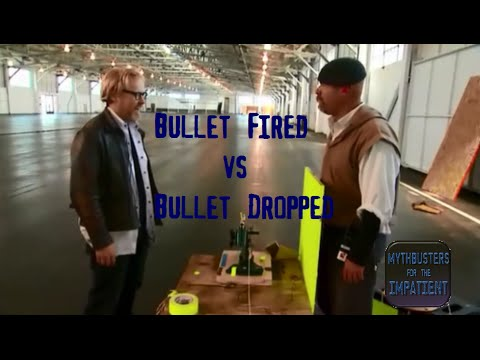

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('tF_zv3TCT1U', width = 600, height = 400, mute = 1)

Because of the independence of motion, the only quantity that the horizontal and vertical motions have in common is the **time of flight**, the time from the start to just before the projectile hits the ground. Whatever the projectile does in the $x$ and $y$ directions, it has to do it in the same time! This will be an important idea -- if we can find the time of flight in one direction, we can use it to get information about the perpendicular direction.

````{admonition} Problem
:class: hint
Identical toy trucks roll off the ends of tables. The heights of the tables and speeds of the trucks are given in the figure. Compare these trucks on how long the trucks are in the air; which choice below is correct?

```{figure} ../img/INT_AY20_MP1_L13_Fig03-Two-trucks-same-speed_small.png
---
height: 200px
---
Two trucks roll off a table with the same speed
```

1. Truck A will be in the air longer than truck B
1. Truck A will be in the air shorter than truck B
1. Both trucks are in the air the same time
````

```{toggle}
*Answer*: Truck A is in the air a shorter time, since it has to fall a shorter vertical distance. The time of flight only depends on the vertical motion of the truck.
```

````{admonition} Problem
:class: hint
Identical toy trucks roll off the ends of tables. The heights of the tables and speeds of the trucks are given in the figure. Compare these trucks on how long the trucks are in the air; which choice below is correct?

```{figure} ../img/INT_AY20_MP1_L13_Fig04-Two-trucks-same-height_small.png
---
height: 200px
---
Two trucks roll off a table from the same height
```

1. Truck A will be in the air longer than truck B
1. Truck A will be in the air shorter than truck B
1. Both trucks are in the air the same time
````

```{toggle}
*Answer*: Both trucks are in the air the same amount of time, since they have exactly the same vertical motion. Truck B will travel a farther *horizontal* distance, since it has a larger horizontal velocity component.
```

For the following two problems, use the vertical motion of the projectile to find the time, and then use that information for solve for the rest of the motion.

```{admonition} Problem
:class: hint
A child rolls a toy car straight off a shelf with a height of 4.00 ft. The initial speed of the car is 55.0 cm/s.

1. How long is the car in the air (in ms)?
1. How far from the base of the shelf does the car land (in cm)?
1. What is the speed of the car (in m/s) when it hits the floor?
```

```{toggle}
*Answers*: 499 ms; 67.0 cm; 4.93 m/s
```

```{admonition} Problem
:class: hint
The Navy's new Electromagnetic Aircraft Launch System (EMALS) launch system uses a linear motor drive (vice a steam piston) to launch carrier-base aircraft off the deck. EMALS can get the aircraft to obtain a take-off speed of 240 km/h. After the problem is a video where you can see a test of the EMALS in action.

The flight deck of the carrier is 18.0 m above the water. Assume air resistance is not a factor.

1. How long is the cart in the air (in s)?
1. How far away from the end of the carrier deck does the cart land (in m)?
1. What speed and direction does the cart hit the water at? Give the speed in m/s and the direction in terms of degrees below the horizontal.
```

```{toggle}
*Answers*: 1.92 s; 128 m; 69.3 m/s, 15.7$^\circ$ below the horizontal
```

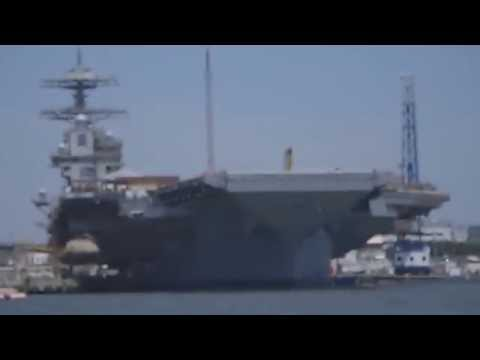

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('rOijb3JPCe4', width = 600, height = 400, mute = 1)

## Graphing projectile motion

As another way to study projectile motion, we now construct graphs of the velocity components as a function of time. The code below will produce two graphs, one for the position components of the ball, and the other for the velocity components. Each graph will have two lines -- the red line for the respective $x$ component, and the blue line for the $y$ component. In this case, the initial velocity is horizontal, so there is a zero launch angle.

(proj-mot-graphs)=
[Back to program list](proj-mot)

In [4]:
from IPython.display import IFrame

IFrame(src="https://trinket.io/embed/glowscript/9f7c3c8262?showInstructions=true", width="100%", height="600")

```{admonition} Problem
:class: hint
What happens to the graphs if the initial velocity has an upward $x$ component? A downward $x$ component? What aspects of the graphs change -- the slope? the value at $t = 0$?
```

We can use graphs such as these to obtain necessary information to solve a problem; remember you did something similar at the end of [Lesson 06 (kinematic equations)](kin-eqns). For all situations, the slope of the $y$ velocity component vs. time will give the gravitational field in the $y$ direction, i.e. the value of $a_y = -g$. If the projectile is initially traveling upward, it will reach a maximum height. This point can be seen in the $r_y$ as its largest value (the "peak" of the curve). As we will talk more about below, the max height is also the point in the $v_y$ vs. $t$ graph when $v_y = 0$, so the line crosses the time axis. The vector components of the projectile's total displacement is given in the differences in each of the position components $r_x$ and $r_y$ over the entire time of flight. Thinking in terms like these will help you when you need to get your givens from a graph.

````{admonition} Problem
:class: hint
A tennis ball is fired off the roof of a building and lands on the ground below at time $T$. The following two graphs show the horizontal and vertical components of the ball's velocity as it falls, between the start of its trajectory up to just *before* the impact.

```{figure} ../img/INT_AY20_MP1_L14_Fig01-Vel-vs-t-graphs_small.png
---
width: 75%
---
Velocity component vs. time graphs for a tennis ball
```

1. How long does it take (in s) for the tennis ball to hit the ground (i.e. what is the time $T$)?
1. How high is the building (in m)?
1. How far horizontally does the ball travel (in m)?
````

```{toggle}
*Answers:* 2.55 s; 31.9 m; 38.2 m
```

````{admonition} Problem
:class: hint
Civilization has collapsed, and you are spending yet another day firing cannonballs horizontally off the wall of your post-apocalyptic fortress at incoming zombies. The graphs below show the horizontal and vertical position of one cannonball as a function of time. Your cannonball hits your target zombie at time $T$.

```{figure} ../img/INT_AY20_MP1_L14_Fig02-Pos-vs-t-graphs_small.png
---
width: 75%
---
Position component vs. time graphs for a cannonball
```

1. How long does it take (in s) for the cannonball to hit the ground (i.e. what is the time $T$)?
1. What is the final vertical velocity component of the cannonball (in m/s)?
1. What is the horizontal velocity component (in m/s)?
1. What is the speed (in m/s) and direction (in degrees below the horizontal) of the cannonball, just as it hits a zombie?
````

```{toggle}
*Answers:* 1.43 s; 14.0 m/s; 11.2 m/s; 17.9 m/s, 51.3$^\circ$ below the horizontal
```

## General launch angle

Up until now, we have only talked primarly about zero launch angle. In other words, the projectile starts off moving only horizontally, so $v_{i, x} = 0$. Now let's look at the general case, for any launch angle. Here, both $v_{i, x}$ and $v_{i, y}$ will be non-zero. So suppose that we are given an initial speed and some launch angle away from the horizontal -- how does that change things? We still have the same acceleration, due solely to the gravitational field. Thus, 

$$
    a_x = 0 \qquad a_y = -g
$$

In addition, since the initial velocity ${\vec v}_i$ is no longer horizontal, an early step will be to split ${\vec v}_i$ into $x$ and $y$ components using the trig functions. For the launch angle $\theta$ measured from the horizontal,
        
$$
    v_{i, x} = v_i \cos \theta \qquad
    v_{i, y} = v_i \sin \theta
$$

Remember to draw the vector diagram for ${\vec v}_i$ to help you choose the signs for these values!

```{figure} ../img/INT_AY21_L07_Fig01-Init-vel-vec-diag_small.png
---
height: 150px
---
Vector diagram for the initial velocity of a projectile
```

If you keep the initial speed the same but vary the launch angle, it will affect the **range**, or the horizontal displacement component $\Delta r_x$. When the projectile is launched at the same height it lands at (i.e. $\Delta r_y = 0$ for the path) and air resistance is negligible, then a $45.0^\circ$ launch angle produces the greatest range. For other choices, complementary angles will give the same range. For example, in the figure below, both $30.0^\circ$ and $60.0^\circ$ give the same range.

```{figure} ../img/INT_AY21_L07_Fig03-Range-vs-angle_small.png
---
width: 50%
---
Range of a projectile as a function of angle; note that this assumes $\Delta r_y = 0 for the entire trajectory
```

As we talked about in [Lesson 05 (acceleration and free fall)](accel), if the projectile is launched *above* the horizontal, then there is a special point in the trajectory, the maximum height. This is the height where the projectile stops moving vertically for an instant, as it switches direction. From the independence of motion idea, however, this says nothing about the horizontal motion! In fact, since there is no horizontal acceleration in projectile motion, the horizontal velocity component will stay the same through the motion. So, at the maximum height, in general the components of the velocity ${\vec v}_{max}$ are

$$
    v_{max, x} = v_{i, x} \qquad v_{max, y} = 0
$$

This highest point will be halfway along the horizontal motion of the object *only* if the vertical displacement is zero. Otherwise, you would have to solve for the time to reach max height.

One fact that *is* always true for projectile motion is that the object has the same speed at the same height. In other words, for a given height above the starting point, for example, the projectile will have the same speed going down as it did going up at that height. Note this is *not* the same as having the same *velocity*. Because the velocity will be pointing in different directions, the vector is not the same. However, the magnitude of the vector is the same. To explain this, remember that $a_x = 0$ tells you the $x$ component of the velocity is constant. The vertical component, on the other hand, will be pointed in the opposite direction when it is pointing upward as when it is pointing downward.

```{figure} ../img/INT_AY21_L07_Fig04-Vel-comps-proj-motion_small.png
---
width: 50%
---
The change in the velocity's vector components at different points of the trajectory
```

The app below features projectile motion, with a range of initial heights, speeds and angles, along with the possibility of adding air resistance. Note that you can see the components of both the velocity and the acceleration as the projectile moves along its flight.

In [5]:
from IPython.display import IFrame

IFrame(width="800", height="600", \
       src="https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_en.html")

```{admonition} Problem
:class: hint
If a projectile is launched with an initial velocity of 25.0 m/s at an angle of 35.0$^\circ$ from the horizontal, which choice gives the magnitude of the projectile's horizontal velocity?

1. 0.00 m/s
1. 12.5 m/s
1. 14.3 m/s
1. 17.7 m/s
1. 20.5 m/s
1. 25.0 m/s
```

```{toggle}
*Answer:* The projectile's horizontal velocity component is $v_i \cos \theta = (25.0 \textrm{ m/s}) \cos 35.0^\circ = 20.5$ m/s.
```

```{admonition} Problem
:class: hint
If a projectile is launched with an initial velocity of 25.0 m/s at an angle of 35.0$^\circ$ from the horizontal, which choice gives the projectile's speed at its maximum height?

1. 0.00 m/s
1. 12.5 m/s
1. 14.3 m/s
1. 17.7 m/s
1. 20.5 m/s
1. 25.0 m/s
```

```{toggle}
*Answer:* At its maximum height, the projectile will be moving horizontally, so the speed at this point is the same as the horizontal velocity component of 20.5 m/s.
```

````{admonition} Problem
:class: hint
As shown below, a cruiser simultaneously fires two shells with the same initial speed at enemy ships. The shells follow the parabolic trajectories shown in the figure below. Which trajectory corresponds to the shell fired with the higher initial *vertical* velocity component?

```{figure} ../img/INT_AY20_MP1_L18_Fig02-Two-ships_small.png
---
width: 75%
name: cruiser-fire-01
---
A cruiser fires at two ships
```

1. Trajectory A
1. Trajectory B
1. Both trajectories are the same
1. Cannot tell without more information
````

```{toggle}
*Answer:* Both shells have the same vertical acceleration, and their vertical velocity components at max height $v_y = 0$. Thus, the shell traveling higher will have the larger initial vertical velocity component. In this case, it is trajectory A.
```

```{admonition} Problem
:class: hint
A cruiser simultaneously fires two shells with the same initial speed at enemy ships. The shells follow the parabolic trajectories shown in {numref}`Figure {number} <cruiser-fire-01>` above. Which ship gets hit first?

1. Ship A
1. Ship B
1. Both have the same
1. Cannot tell without more information
```

```{toggle}
*Answer:* Because trajectory B has a smaller initial height, and the same vertical acceleration, it will have a smaller time of flight than trajectory A. Thus, ship B will be hit first.
```

````{admonition} Problem
:class: hint
As shown below, a cruiser simultaneously fires two shells with *different* speeds at enemy ships. If the shells follow the parabolic trajectories with the same maximum height as shown below, which ship gets hit first?

```{figure} ../img/INT_AY20_MP1_L18_Fig03-Two-ships_small.png
---
width: 75%
---
A cruiser fires a second salvo at the two ships
```

1. Ship A
1. Ship B
1. Both get hit at the same time
1. Cannot tell without more information
````

```{toggle}
*Answer:* The shell trajectories have exactly the same *vertical* motion, so they will take the same amount of time to reach their targets. Thus, both ships get hit at the same time.
```

## Example: firing a cannonball

When working through a projectile motion problem with general launch angle, there are several issues where you have to be careful. I will use the following problem as an example, to point out these potential pitfalls.

```{admonition} Problem
:class: hint
A cannonball is fired off a cliff with a speed of 50.0 m/s and an angle of 35.0$^\circ$ above the horizontal. The projectile hits the ground 175 yd horizontally from where it was launched.

1. What is the speed (in m/s) of the football at the maximum height?
1. What is the height of the cliff above the ground below (in m)?
1. What is the maximum height (in m) the cannonball reaches above the ground?
1. What is the velocity of the cannonball just before it hits the ground? Find the speed in m/s and the direction in degrees below the horizontal.
```

The big change from a zero launch angle problem is that there is a new first step you have to take: draw a vector diagram for ${\vec v}_i$,

```{figure} ../img/INT_AY22_L08_Fig01_vi_vec_diag.png
---
height: 150px
---
Vector diagram for the cannonball's initial velocity
```

then find its vector components. So, since we know the initial speed $v_i$ is 50.0 m/s, and the launch angle is $\theta = 35.0^\circ$, then the initial velocity components are

$$
    v_{i, x} = v_i \cos \theta = 41.0 \textrm{ m/s} \qquad
    v_{i, y} = v_i \sin \theta = 28.7 \textrm{ m/s}
$$

At this point, we can list our givens and unknowns for the problem in tabular form. The initial position ${\vec r}_i$ is where the cannonball is launched, the max height is given by the vector ${\vec r}_{max}$, and the ball hits the ground below at position ${\vec r}_f$. Note that we have already used the fact that $a_x = 0$ to give $v_{i, x} = v_{max, x} = v_{f, x}$ in the table. We also know that the maximum height is when the ball stops moving upward, and starting moving downward; this means that $v_y = 0$ at this point.

| Quantity         | $x$          | $y$           |
|------------------|--------------|---------------|
| ${\vec r}_i$     | 0.00 m       | 0.00 m        |
| ${\vec r}_{max}$ | ? m          | ? m           |
| ${\vec r}_f$     | 350. yd      | ? m           |
| ${\vec v}_i$     | 41.0 m/s     | 28.7 m/s      |
| ${\vec v}_{max}$ | 41.0 m/s     | 0.00 m/s      |
| ${\vec v}_f$     | 41.0 m/s     | ? m/s         |
| ${\vec a}$       | 0.00 m/s$^2$ | -9.81 m/s$^2$ |

```{admonition} Problem
:class: hint
Convert 350. yd into meters.
```

```{toggle}
*Answer:* 320 meters
```

So we can already answer the first question -- at the highest point, the projectile has $v_x = 41.0$ m/s and $v_y = 0.00$ m/s, giving a magnitude of 41.0 m/s.

Now, let's find the vertical displacement of the cannonball over its entire trajectory. To start, I don't know enough on the $y$ side to find out what $\Delta r_y$ is. This means I need to see if I have more information on the $x$ side; if I can find the time of flight for the projectile, I can use that to find $\Delta r_y$. It turns out this is the case here! We know how far the ball has traveled horizontally, and we know how fast it is moving along the $x$ axis. Then we can find the time of flight for the ball. Once we have that, we can use this time back in the vertical direction to find out how high it is vertically. To put this into practice, we have a few options for the kinematic equation to choose. Let's go with

$$
    \Delta r_x = v_{i, x} t + \frac{1}{2} a_x t^2 \Rightarrow t = \frac{\Delta r_x}{v_{i, x}}
$$

where this simplification happens since $a_x = 0$. Using the known values in the second equation above gives a time of flight $t = 7.81$ s. Now, moving to the $y$ side of things, with the same base kinematic equation,

$$
    \Delta r_y = v_{i, y} t + \frac{1}{2} a_y t^2
$$

we get the vertical displacement for the entire path from start to finish is $\Delta r_y = -75.0$ m.

```{admonition} Watch your signs
:class: warning
When I say "change in height", I am talking about a *scalar* quantity. However, $\Delta r_y$ is actually a *vector* component, so I am really finding $h = |\Delta r_y|$, the size of this component. So I say the change in height is 75.0 m. Make sure you understand the difference between the scalar height $h$ and the vector displacement $\Delta {\vec r}$. As you will see later, not watching your signs may cause problems if you are not careful!
```

Let's now find the max height above the ground; we will do this by finding the height above the launch point, and just add the 75.0 m height of the cliff to get the total. To do this, we know that $v_{max, y} = 0$ -- the projectile has stopped its vertical motion at its highest point, and is turning around at that instant. So we can use the equation

$$
    v_{max, y} ^2 = v_{i, y} ^2 + 2 a_y \Delta r_y \Rightarrow \Delta r_y = -\frac{v_{i, y} ^2}{2 a_y}
$$

to find the displacement from launch to max height is 42.0 m, and the total height above the ground is 117 m.

Finally, we can find the final velocity of the ball, just as it lands on the ground. Remember, this is *not* ${\vec v}_f = 0$, because we are only taking the effects of the gravitational field into account. We need to find the final $y$ velocity component (we already know $v_{f, x}$, since it is constant). This can be done with

$$
    v_{f, y} = v_{i, y} + a_y t
$$

to give $v_{f, y} = -47.9$ m/s. It is *negative* since the ball is heading downward at this point; it has moved past its highest point. This is why the last part of the question asks to find the direction as an angle *below* the horizontal. Drawing another vector diagram for the final velocity ${\vec v}_f$,

```{figure} ../img/INT_AY22_L08_Fig02_vf_vec_diag.png
---
height: 150px
---
Vector diagram for the cannonball's final velocity
```

and using the Pythagorean theorem and inverse tangent to find magnitude and direction, we have

$$
    v_f = \sqrt{v_{f, x} ^2 + v_{f, y} ^2} = 63.1 \textrm{ m/s} \qquad
    \theta = \tan^{-1} \biggl( \biggl| \frac{v_{f, y}}{v_{f, x}} \biggr| \biggr) = 49.4^\circ
$$

Thus, the cannonball is moving at 63.1 m/s, 49.4$^\circ$ below the horizontal, when it is just about to hit the ground.

```{admonition} Problem
:class: hint
Sketch the horizontal and vertical position graphs for the cannonball during its flight. Mark the initial and final points, and the highest point, on each of the graphs.
```

Let's go back to the issue of signs. For all of the calculations above, once we chose the sign for our givens, the signs for the results were fixed. However, there *is* one additional place where you have to choose the sign. We'll see this by noticing there was another option to find $v_{f, y}$, specifically the kinematic equation

$$
    v_{f, y} ^2 = v_{i, y} ^2 + 2 a_y \Delta r_y
$$

If you use this to find $v_{f, y}$, you would take the square root of both sides. How many solutions would you then get? You would have *two* solutions, since both the positive and negative square root are valid:

$$
    v_{f, y} = \pm \sqrt{v_{i, y} ^2 + 2 a_y \Delta r_y}
$$

So which solution is correct? The cannonball is moving *downward* when it is about to hit the ground, so you should choose the negative sign.

```{admonition} Signs in the kinematic equations
:class: warning
The *only* time you choose the signs when using the kinematic equations is (1) when writing down the original givens, and (2) choosing which square root to use in the above equation. For the rest, the signs should come out naturally.
```

This issue of signs is important for what we are about to do. To show this, use the equation just above for $v_{f, y}$ and plug in $v_{i, y} = 28.7$ m/s, $a_y = -9.81$ m/s$^2$, and $\Delta r_y = 75.0$ m into your calculator, to see what happens. You should get a domain error! Why is this? The values that I just listed were not correct, since I didn't put the negative sign for $\Delta r_y$. Make sure you watch your signs! When you use $\Delta r_y = -75.0$ m, you should get the same answer as before, or $v_{f, y} = -47.9$ m/s.

Now it's your turn to practice, with the following problems.

```{admonition} Problem
:class: hint
A quarterback throws a football towards a wide receiver with an initial velocity of 12.5 m/s at an angle of 50.0$^\circ$ above the horizontal. The wide receiver is 16.0 yards away from the quarterback.
 
1. What is the speed (in m/s) of the football at the maximum height?
1. How high (in m) does the football get above its starting point at its highest position?
1. If the quarterback and the wide receiver are about the same height, how high (in m) would the receiver have to jump to catch the ball?
1. What is the velocity of the ball when it is caught? Find the speed in m/s, and the direction in degrees below the horizontal.
```

```{toggle}
*Answers:* 8.03 m/s; 4.67 m; 1.17 m; 11.5 m/s, 45.9$^\circ$ below the horizontal
```

````{admonition} Problem
:class: hint
A catapult on a cliff launches a large round rock towards a ship on the ocean below with a speed $v_i$ m/s at an angle $\theta$. The rock leaves the catapult from a height $h$ (in meters) above the ship.  It hits the ship $t$ (in s) after launch.

```{figure} ../img/INT_AY20_MP1_L17_Fig01-Ship-and-catapult_small.png
---
width: 50%
---
Launching a rock at a ship below using a catapult on a cliff
```

Assume that the initial speed, angle, initial height, and time of flight are given numbers, represented by Python variables `v_i`, `Q`, `h`, and `t`, respectively. You will write three vPython functions, as described below. You can test your functions with the given values of $v_i = 36.0$ m/s, $\theta = 41.0^\circ$, $h = 34.9$ m, and $t = 6.00$ s. **Hint:** you may not need all four given values for each function, and remember that in vPython, `sin` and `cos` take their angles in radians, not degrees!

1. Write a vPython function `projRange(v_i, Q, h, t)` that calculates the range, and returns its value in meters. With the test values, your function should return a range of 163 m.
1. Write a vPython function `finalVelocity(v_i, Q, h, t)` that returns the final velocity of the projectile, just as it hits the ship, as a vPython vector. The test values should result in a final velocity of $(27.2 \textrm{ m/s}) {\hat x} + (-35.2 \textrm{ m/s}) {\hat y}$.
1. Write a vPython function `maxHeight(v_i, Q, h, t)` computing the maximum height above the *ship* (not the launch point!), and returns its value in meters. With the test values, your function should return a maximum height of 63.3 m above the ship.
````

````{toggle}
*Answers:* Here are some possible solutions to these questions.

```python
def projRange(v_i, Q, h, t):

    # Find x component of initial velocity
    
    v_ix = v_i * cos(radians(Q))
    
    # Return Dr_x using constant velocity eqn
    # in x direction (since a_x = 0)
    
    return v_ix * t
```

```python
def finalVelocity(v_i, Q, h, t):

    # Define initial velocity in unit vector form
    
    vel_i = vector(v_i * cos(radians(Q)), v_i * sin(radians(Q)), 0)

    # Define const acceleration of projectile
    
    a = vector(0, -9.81, 0)          # in m/s^2
    
    # Return v_f using v_f = v_i + a t
    
    return vel_i + a * t
```

```python
def maxHeight(v_i, Q, h, t):

    # Define y component of initial velocity
    
    v_iy = v_i * sin(radians(Q))

    # Define y component of acceleration
    
    a_y = -9.81          # in m/s^2

    # Find height above starting point
    
    Dr_y = - (v_iy ** 2) / (2 * a_y)
    
    # Return total height above ship,
    # including initial height h
    
    return h + Dr_y
```
````

````{admonition} Problem
:class: hint
Imagine you fired a mortar at a target $A$ with a speed $v_i = 39.0$ m/s at $\theta = 60.0^{\circ}$ above the horizontal, as shown in the figure below.

```{figure} ../img/INT_AY20_MP1_L18_Fig01-Mortar-trajectory_small.png
---
width: 50%
---
Firing at a target up on a cliff
```

1. Use the quadratic formula to find the time it takes (in s) for the mortar round to hit the target ($h = 44.8$ m).
1. Find the maximum height (in m) above the ground reached by the round.
````

```{toggle}
*Answers:* 5.08 s; 58.1 m
```

## Summary

Projectile motion provides a good summary of everything you have done in the course so far. You must use the kinematic equations to solve for the position and velocity vectors, based on the given acceleration. Hopefully you have also seen how graphs can be informative, especially when trying to find specific points of the trajectory, such as the maximum height.

After this lesson, you should be able to:

* Solve a projectile motion problem for any value of launch angle.
* Given a vertical velocity vs. time graph, find the acceleration or time of flight.
* Given a horizontal velocity vs. time graph, find the horizontal displacement.